<a href="https://colab.research.google.com/github/rokmr/Kick-Start-AI/blob/main/src/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Import

In [1]:
from tqdm import tqdm
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.amp import autocast, GradScaler
from torch.utils.data import DataLoader, TensorDataset

from torchvision import models, transforms, datasets

import matplotlib.pyplot as plt

## Model

In [2]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_features=28*28, out_features=20),
        nn.ReLU(),
        nn.Linear(in_features=20, out_features=10),
    )

  def forward(self, x):
    return self.layers(x)

# Activation

In [3]:
def activation_plotter(f, f_prime, title):
    x = np.linspace(-5, 5, 100)
    y = f(x)
    y_prime = f_prime(x)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(title, fontsize=14, y=1.05)

    ax1.plot(x, y)
    ax1.set_title('f(x)')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.axhline(y=0, color='k', linewidth=0.5)
    ax1.axvline(x=0, color='k', linewidth=0.5)

    ax2.plot(x, y_prime, c='r')
    ax2.set_title('f\'(x)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.axhline(y=0, color='k', linewidth=0.5)
    ax2.axvline(x=0, color='k', linewidth=0.5)

    plt.tight_layout()
    plt.show()

## Sigmoid

$f(x) = \frac{1}{1 + e^{-x}} = \sigma(x)$

$f'(x) = f(x)(1 - f(x)) = \sigma(x)(1 - \sigma(x))$

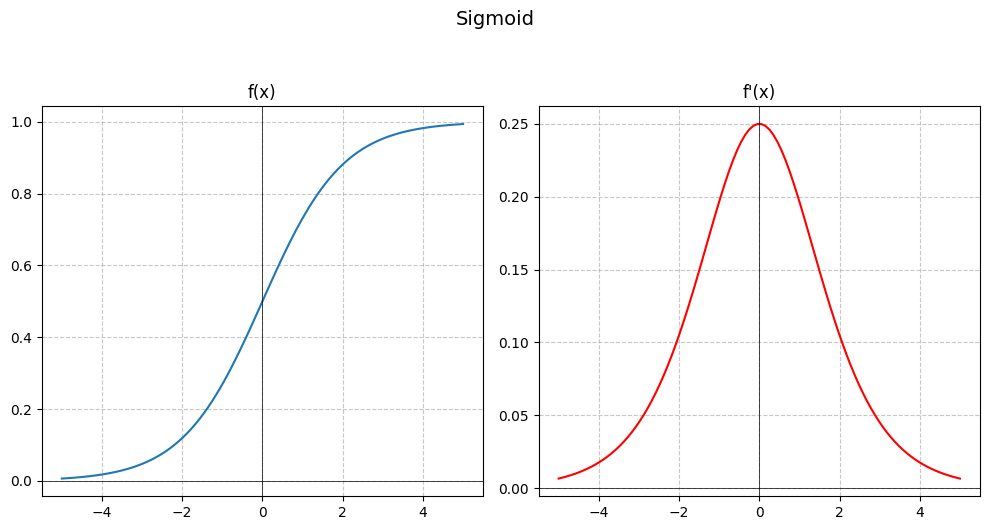

In [4]:
f = lambda x: 1 / (1 + np.exp(-x))
f_prime = lambda x: f(x) * (1 - f(x))
activation_plotter(f, f_prime, 'Sigmoid')

## Tanh

$f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

$f'(x) = 1 - \tanh^2(x) = 1 - f^2(x)$


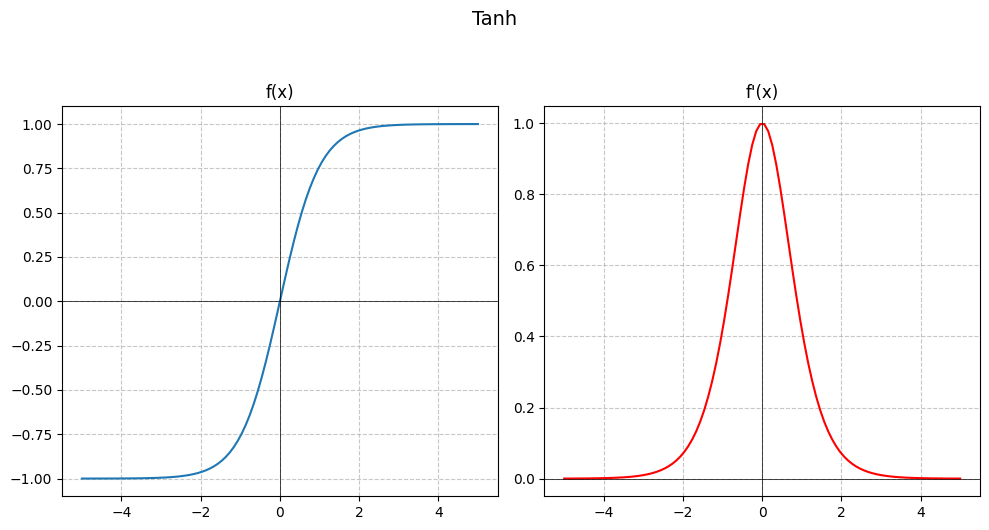

In [5]:
f = lambda x: np.tanh(x)
f_prime = lambda x: 1 - np.tanh(x)**2
activation_plotter(f, f_prime, 'Tanh')

## ReLU

$f(x) = \max(0, x) = \begin{cases}
x & \text{if } x > 0 \\
0 & \text{if } x \leq 0
\end{cases}$

$f'(x) = \begin{cases}
1 & \text{if } x > 0 \\
0 & \text{if } x \leq 0
\end{cases}
$

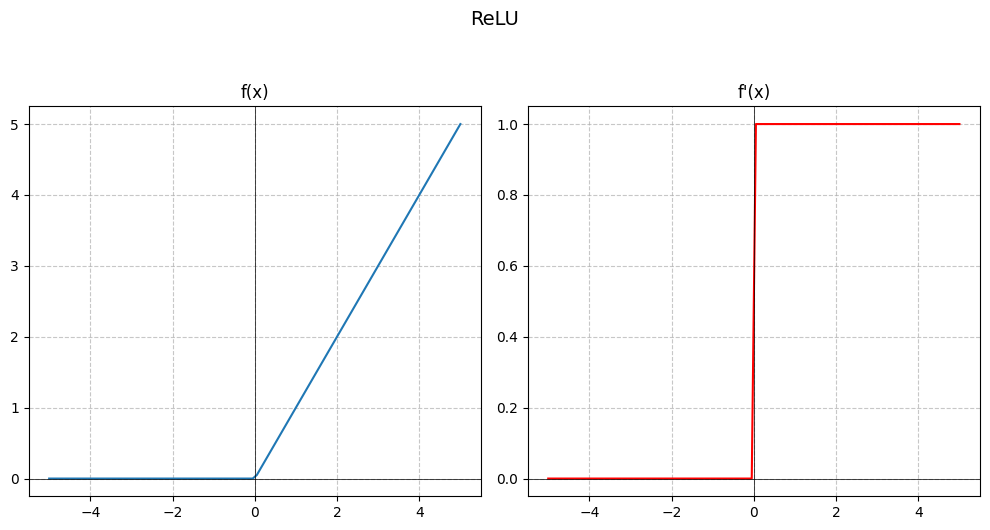

In [6]:
f = lambda x: np.maximum(0, x)
f_prime = lambda x: np.where(x > 0, 1, 0)
activation_plotter(f, f_prime, 'ReLU')

## Leaky ReLU

$f(x) = \begin{cases}
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0
\end{cases}$

$f'(x) = \begin{cases}
1 & \text{if } x > 0 \\
\alpha & \text{if } x \leq 0
\end{cases}$

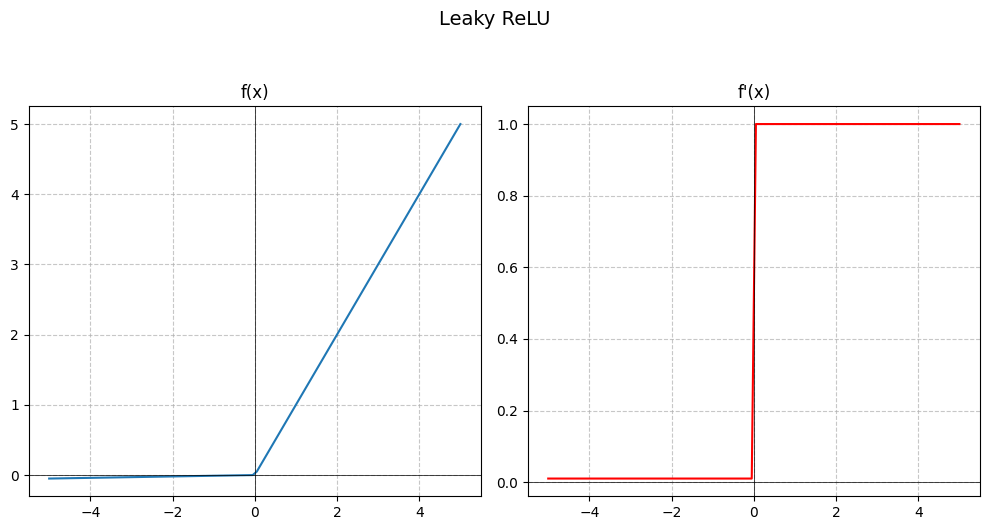

In [7]:
f = lambda x: np.where(x > 0, x, 0.01 * x)
f_prime = lambda x: np.where(x > 0, 1, 0.01)
activation_plotter(f, f_prime, 'Leaky ReLU')

## ELU (Exponential Linear Unit)

$f(x) = \begin{cases}
x & \text{if } x > 0 \\
\alpha(e^x - 1) & \text{if } x \leq 0
\end{cases}$

$f'(x) = \begin{cases}
1 & \text{if } x > 0 \\
\alpha e^x & \text{if } x \leq 0
\end{cases}$


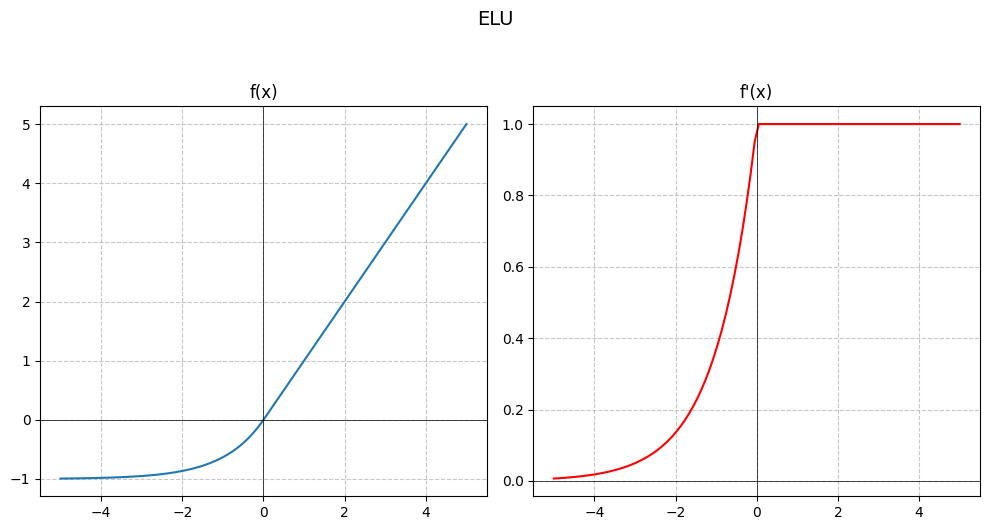

In [8]:
f = lambda x: np.where(x > 0, x, 1.0 * (np.exp(x) - 1))
f_prime = lambda x: np.where(x > 0, 1, 1.0 * np.exp(x))
activation_plotter(f, f_prime, 'ELU')

## Swish

$f(x) = x \cdot \sigma(x)$

$f'(x) = f(x) + \sigma(x)(1 - f(x))$

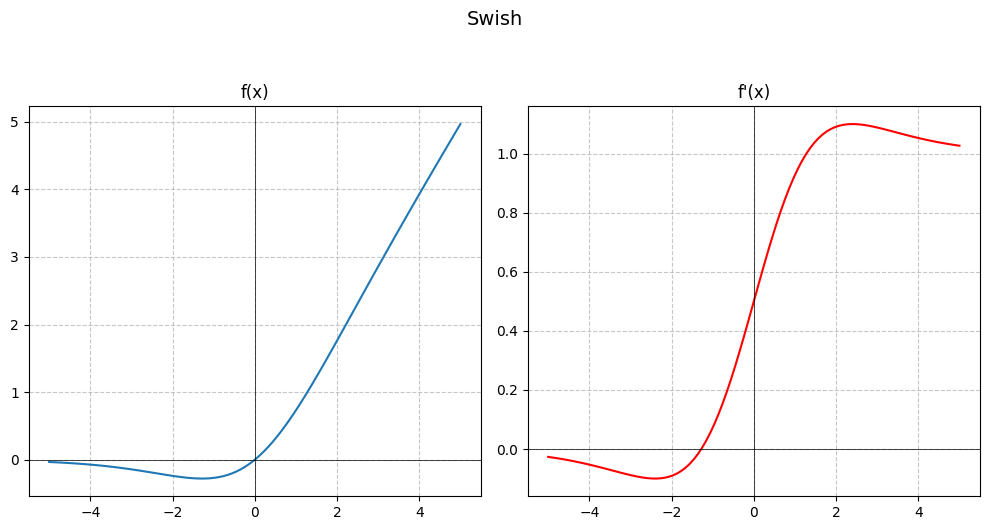

In [9]:
f = lambda x: x * (1 / (1 + np.exp(-x)))
f_prime = lambda x: f(x) + (1 / (1 + np.exp(-x))) * (1 - f(x))
activation_plotter(f, f_prime, 'Swish')

## PReLU (Parametric ReLU)

$f(x) = \begin{cases}
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0
\end{cases}$

$f'(x) = \begin{cases}
1 & \text{if } x > 0 \\
\alpha & \text{if } x \leq 0
\end{cases}$

$\alpha :$ Learnable Parameter

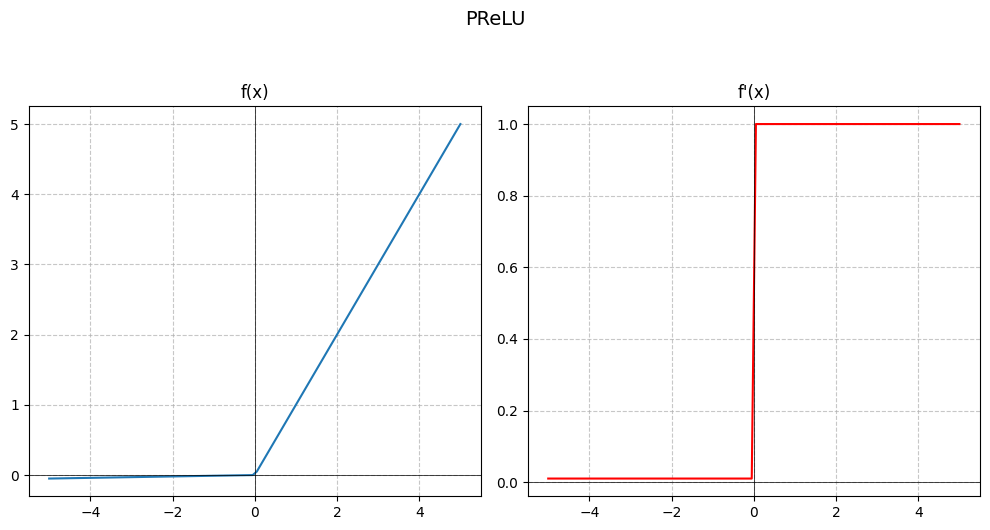

In [10]:
alpha = 0.01  # learnable parameter
f = lambda x: np.where(x > 0, x, alpha * x)
f_prime = lambda x: np.where(x > 0, 1, alpha)
activation_plotter(f, f_prime, 'PReLU')

## GeLU

$f(x) = x \cdot \Phi(x)$

$f'(x) = \Phi(x) + x\Phi(x)$

$\Phi(x) : \text{Cumulative Distribution Function of Gaussian}$

$\Phi(x) = \frac{1}{2}\left[1 + \text{erf}\left(\frac{x}{\sqrt{2}}\right)\right] = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^x e^{-\frac{t^2}{2}}dt$


$\Phi(x) = 0.5 * (1 + \tanh(\sqrt{\frac{2}{\pi}} * (x + 0.044715 * x^3)))$


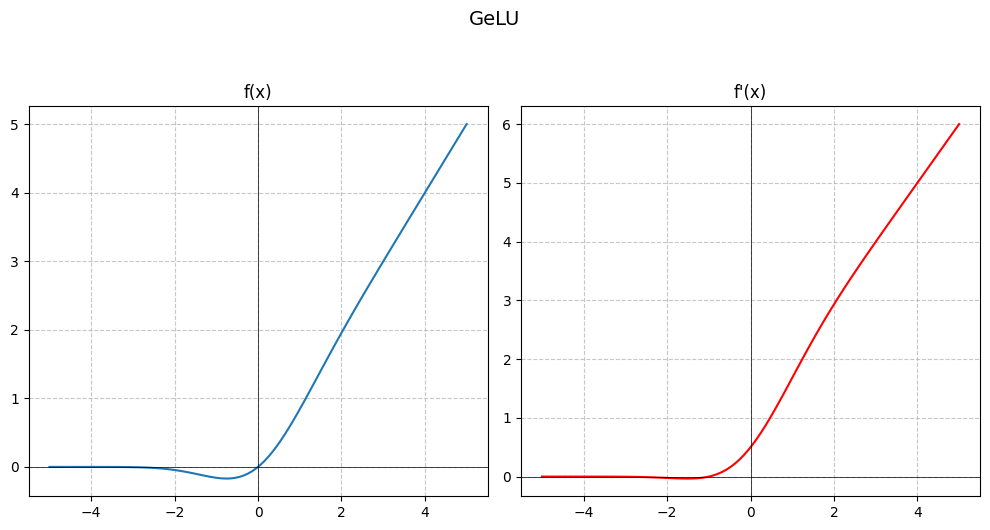

In [11]:
phi = lambda x: 0.5 * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))
f = lambda x: x * phi(x)
f_prime = lambda x: phi(x) + x * phi(x)
activation_plotter(f, f_prime, 'GeLU')

## Linear

$f(x) = x$

$f'(x) = 1$

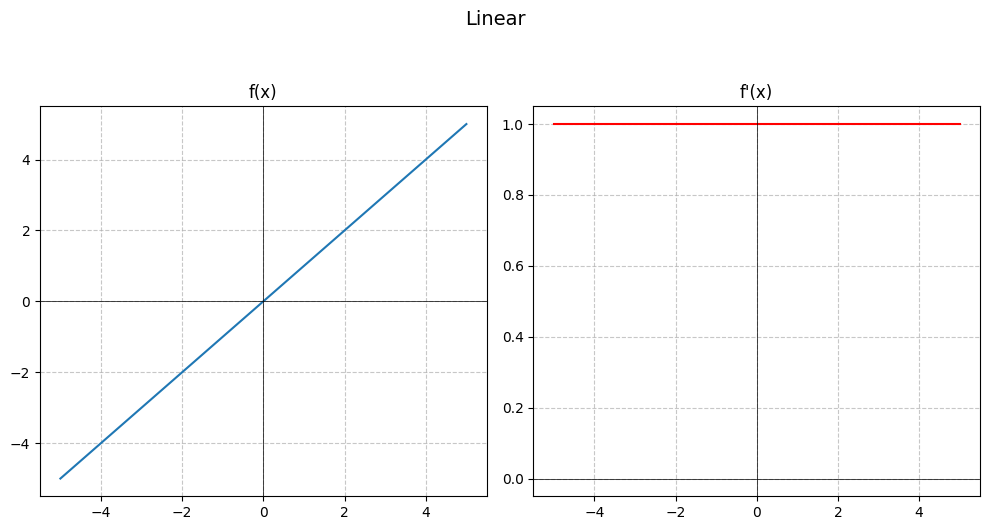

In [12]:
f = lambda x: x
f_prime = lambda x: np.ones_like(x)
activation_plotter(f, f_prime, 'Linear')

# Optimizer

In [13]:
model = Model()

In [14]:
# Hyper-Params
LR = 0.01
WD = 0.1
MOMENTUM = 0.9
eps = 1e-10
ALPHA = 0.99
BETAS = (0.9, 0.999)

## [SGD](https://docs.pytorch.org/docs/stable/generated/torch.optim.SGD.html)

$w_{t+1} = w_t - \eta \nabla w_t$

In [15]:
optimizer = torch.optim.SGD(params= model.parameters(), lr=LR)

In [16]:
# weight decay (L2 penalty)
optimizer = torch.optim.SGD(params=model.parameters(), lr=LR, weight_decay=WD)

## Momentum Based GD
$update_t = \gamma \cdot update_{t-1} + \eta \nabla w_t$

$w_{t+1} = w_t - update_t$

In [17]:
optimizer = torch.optim.SGD(params= model.parameters(), lr=LR, momentum=MOMENTUM)

## Nesterov Accelerated GD

$update_t = \gamma \cdot update_{t-1} + \eta \nabla (w_t- \gamma \cdot update_{t-1})$

$w_{t+1} = w_t - update_t$

In [18]:
optimizer = torch.optim.SGD(params= model.parameters(), lr=LR, momentum=MOMENTUM, nesterov=True)

## [AdaGrad](https://docs.pytorch.org/docs/stable/generated/torch.optim.Adagrad.html#torch.optim.Adagrad)

$v_t = v_{t-1} + (\nabla w_t)^2$

$w_{t+1} = w_t - \frac{\eta}{\sqrt{v_t + \epsilon }}* \nabla w_t$

effective_lr = initial_lr / sqrt(accumulated_squared_gradients + eps)

In [19]:
optimizer = torch.optim.Adagrad(params=model.parameters(), lr=LR, eps=eps)

## [RMSProp](https://docs.pytorch.org/docs/stable/generated/torch.optim.RMSprop.html#torch.optim.RMSprop)

$v_t = \alpha * v_{t-1} + (1- \alpha) *(\nabla w_t)^2$

$w_{t+1} = w_t - \frac{\eta}{\sqrt{v_t + \epsilon }}* \nabla w_t$

In [20]:
optimizer = torch.optim.RMSprop(
    params=model.parameters(),
    lr=LR,
    alpha=ALPHA,        # smoothing constant (default: 0.99)
    eps=eps,
)

## [Adam](https://docs.pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)

$m_t = \beta_1 * v_{t-1} + (1- \beta_1) * \nabla w_t$

$v_t = \beta_2 * v_{t-1} + (1- \beta_2) *(\nabla w_t)^2$

**Bias Correction**

$\hat{m_t} = \frac{m_t}{1-\beta_1^t}$

$\hat{v_t} = \frac{v_t}{1-\beta_2^t}$


$w_{t+1} = w_t - \frac{\eta}{\sqrt{\hat{v_t} + \epsilon }} * \nabla \hat{m_t}$

In [21]:
optimizer = torch.optim.Adam(
    params=model.parameters(),
    lr=LR,
    betas=BETAS, # coefficients for computing running averages of gradient and its square (default: (0.9, 0.999))
    eps=eps,
)

# LR Schedulers

In [22]:
model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [23]:
def plotter(scheduler, title):
  lrs = []

  for i in range(10):
      optimizer.step()
      lrs.append(optimizer.param_groups[0]["lr"])
      scheduler.step()

  plt.title(title)
  plt.grid(True, linestyle='--', alpha=0.7)
  plt.axhline(y=0, color='k', linewidth=0.5)
  plt.axvline(x=0, color='k', linewidth=0.5)
  plt.xlabel('Steps')
  plt.ylabel('Learning Rate')
  plt.plot(range(10), lrs)

## StepLR

$lr_{epoch} = \begin{cases}
\gamma * lr_{epoch-1}, & \text{if epoch % step_size = 0} \\
lr_{epoch-1}, & \text{otherwise}
\end{cases}$

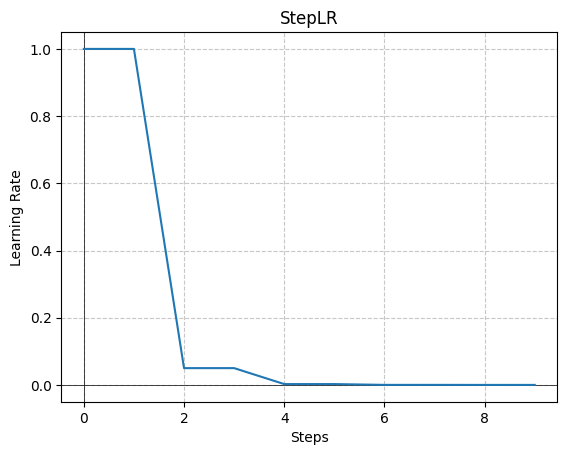

In [24]:
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.05)
plotter(scheduler, title='StepLR')

## MultiStepLR

$lr_{epoch} = \begin{cases}
\gamma * lr_{epoch-1}, & \text{if epoch in milestones} \\
lr_{epoch-1}, & \text{otherwise}
\end{cases}$


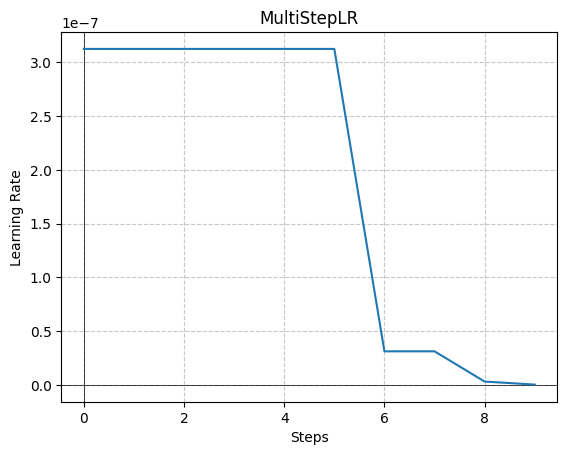

In [25]:
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[6,8,9], gamma=0.1)
plotter(scheduler, title='MultiStepLR')

## ExponentialLR

$lr_{epoch} = \gamma * lr_{epoch-1}$

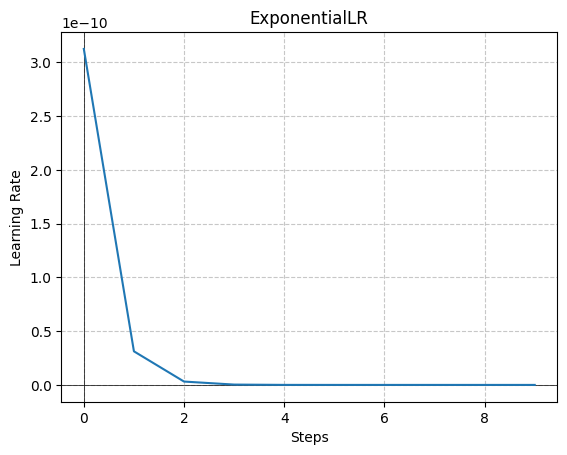

In [26]:
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.1)
plotter(scheduler, title='ExponentialLR')

# Mixed Precision Training

## [Automatic Mixed Precision](https://docs.pytorch.org/docs/stable/amp.html#autocast-op-reference)

In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

input = torch.randn(1, 28*28)
target = torch.tensor([5])
model = Model()
ce = nn.CrossEntropyLoss()
use_amp = True
with autocast(device, enabled=use_amp):
    output = model(input)
    output = output.view(1, -1)
    ce_loss = ce(output, target)

print(f"Output shape: {output.shape} || Target shape:, {target.shape}")

Output shape: torch.Size([1, 10]) || Target shape:, torch.Size([1])


## [GradScaler](https://docs.pytorch.org/docs/stable/amp.html#gradient-scaling)

It helps prevent gradients with small magnitudes from flushing to zero
(\"underflowing\") when training with mixed precision.

In [28]:
class Model2(nn.Module):
  def __init__(self, in_size, out_size, num_layers, hidden_size=None):
    super().__init__()
    if hidden_size is None:
        hidden_size = in_size

    layers = []

    layers.extend([
        nn.Linear(in_size, hidden_size),
        nn.ReLU(),
        nn.BatchNorm1d(hidden_size),  # Optional: add batch normalization
        nn.Dropout(0.2)
    ])

    for _ in range(num_layers - 2):
        layers.extend([
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_size),
            nn.Dropout(0.2)
        ])

    layers.append(nn.Linear(hidden_size, out_size))

    self.module = nn.Sequential(*layers)
    self._init_weights()

  def _init_weights(self):
    for m in self.modules():
        if isinstance(m, nn.Linear):
            nn.init.xavier_normal_(m.weight)
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)

  def forward(self, x):
    return self.module(x)

In [29]:
batch_size = 512 # Try, for example, 128, 256, 513.
in_size = 4096
out_size = 4096
num_layers = 3
num_batches = 50
epochs = 3

model = Model2(in_size, out_size, num_layers)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
use_amp = True if device == 'cuda' else False  # Only use AMP with CUDA

data = [torch.randn(batch_size, in_size, device=device) for _ in range(num_batches)]
targets = [torch.randn(batch_size, out_size, device=device) for _ in range(num_batches)]

model = model.to(device)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [30]:
scaler = GradScaler(enabled=use_amp)

for epoch in range(epochs):
    total_loss = 0

    for input, target in zip(data, targets):
        optimizer.zero_grad()

        with autocast(device, enabled=use_amp):
            output = model(input)
            loss = loss_fn(output, target)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()


    avg_loss = total_loss / num_batches
    print(f'Epoch [{epoch+1}/{epochs}] || Average Loss: {avg_loss:.4f}')


Epoch [1/3] || Average Loss: 2.2392
Epoch [2/3] || Average Loss: 2.2126
Epoch [3/3] || Average Loss: 2.1870


## Gradient Clipping
```python
# Clip gradient norm
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

# Clip gradient value
torch.nn.utils.clip_grad_value_(model.parameters(), clip_value=1.0)
```

In [31]:
scaler = GradScaler(enabled=use_amp)

for epoch in range(epochs):
    total_loss = 0

    for input, target in zip(data, targets):
        optimizer.zero_grad()

        with autocast(device, enabled=use_amp):
            output = model(input)
            loss = loss_fn(output, target)

        scaler.scale(loss).backward()

        scaler.unscale_(optimizer)
        # torch.nn.utils.clip_grad_norm_(net.parameters(), max_norm=0.1)
        torch.nn.utils.clip_grad_value_(model.parameters(), clip_value=1.0)

        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()


    avg_loss = total_loss / num_batches
    print(f'Epoch [{epoch+1}/{epochs}] || Average Loss: {avg_loss:.4f}')

Epoch [1/3] || Average Loss: 2.1622
Epoch [2/3] || Average Loss: 2.1376
Epoch [3/3] || Average Loss: 2.1146


# Custom Learning Rate for Different Layers

In [32]:
class Model3(nn.Module):
    def __init__(self, num_classes, pretrained=True, freeze_base=False):
        super(Model3, self).__init__()

        self.base = models.resnet50(pretrained=pretrained)

        if freeze_base:
            for param in self.base.parameters():
                param.requires_grad = False

        in_features = self.base.fc.in_features
        self.base.fc = nn.Identity()

        self.classifier = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.base(x)
        x = self.classifier(x)
        return x

In [33]:
model = Model3(4)
optimizer = torch.optim.Adam([
    {'params': model.base.parameters()},                   # Base lr = 0.01 (default)
    {'params': model.classifier.parameters(), 'lr': 1e-3}  # Classifier lr = 0.001
], lr=1e-2)  # default learning rate


optimizer = torch.optim.Adam([
    {'params': model.base.parameters(), 'lr': 1e-2},      # Base lr = 0.01
    {'params': model.classifier.parameters(), 'lr': 1e-3}  # Classifier lr = 0.001
])

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 175MB/s]


# Weight Initialization

In [34]:
class Model4(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=3),
    )

  def forward(self, x):
    return self.layers(x)

In [35]:
model = Model4()
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Data: {param.data} | Parameters: {param.numel()}")

Layer: layers.0.weight | Size: torch.Size([3, 2]) | Data: tensor([[-0.4091, -0.2090],
        [ 0.4350, -0.6252],
        [-0.5565,  0.3673]]) | Parameters: 6
Layer: layers.0.bias | Size: torch.Size([3]) | Data: tensor([-0.0448,  0.3542, -0.1885]) | Parameters: 3


## Xavier Initialization

In [36]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

model.apply(init_weights)
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Data: {param.data} | Parameters: {param.numel()}")

Layer: layers.0.weight | Size: torch.Size([3, 2]) | Data: tensor([[-0.7753,  0.1749],
        [ 0.9288,  0.3357],
        [-0.9911, -0.4867]]) | Parameters: 6
Layer: layers.0.bias | Size: torch.Size([3]) | Data: tensor([0.0100, 0.0100, 0.0100]) | Parameters: 3


# Early Stopping

In [37]:
class EarlyStopping:
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

In [38]:
class Model5(nn.Module):
    def __init__(self):
        super(Model5, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(10, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.layers(x)

def generate_dummy_data():
    X = torch.randn(1000, 10)
    y = torch.sum(X, dim=1, keepdim=True)
    return X, y

def train_model():

    device = 'cpu'

    model = Model5().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    early_stopping = EarlyStopping(patience=5, min_delta=1e-4)

    X, y = generate_dummy_data()
    train_size = int(0.8 * len(X))

    X_train, X_val = X[:train_size], X[train_size:]
    y_train, y_val = y[:train_size], y[train_size:]

    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)

    train_loader = DataLoader(
        train_dataset,
        batch_size=32,
        shuffle=True,
        generator=torch.Generator(device=device)
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=32,
        shuffle=False,
        generator=torch.Generator(device=device)
    )

    epochs = 1000
    for epoch in range(epochs):

        model.train()
        train_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()

            val_loss /= len(val_loader)

        # Early stopping
        early_stopping(val_loss)

        if epoch % 10 == 0:
          print(f'Epoch [{epoch+1}/{epochs}] || Train Loss: {train_loss:.4f} || Val Loss: {val_loss:.4f}')

        if early_stopping.early_stop:
          print("Early stopping triggered")
          break

if __name__ == "__main__":
    train_model()


Epoch [1/1000] || Train Loss: 8.3836 || Val Loss: 7.6684
Epoch [11/1000] || Train Loss: 0.0583 || Val Loss: 0.0658
Epoch [21/1000] || Train Loss: 0.0276 || Val Loss: 0.0365
Epoch [31/1000] || Train Loss: 0.0177 || Val Loss: 0.0252
Epoch [41/1000] || Train Loss: 0.0126 || Val Loss: 0.0193
Epoch [51/1000] || Train Loss: 0.0093 || Val Loss: 0.0159
Epoch [61/1000] || Train Loss: 0.0070 || Val Loss: 0.0132
Epoch [71/1000] || Train Loss: 0.0053 || Val Loss: 0.0113
Epoch [81/1000] || Train Loss: 0.0042 || Val Loss: 0.0098
Epoch [91/1000] || Train Loss: 0.0034 || Val Loss: 0.0087
Epoch [101/1000] || Train Loss: 0.0029 || Val Loss: 0.0077
Epoch [111/1000] || Train Loss: 0.0025 || Val Loss: 0.0071
Epoch [121/1000] || Train Loss: 0.0021 || Val Loss: 0.0066
Epoch [131/1000] || Train Loss: 0.0018 || Val Loss: 0.0062
Epoch [141/1000] || Train Loss: 0.0016 || Val Loss: 0.0057
Early stopping triggered


# Custom Training Loop with Multiple Optimizers

In [39]:
def discriminator_loss(model, data):
    real_pred = model.discriminator(data)
    fake_pred = model.discriminator(model.generator(torch.randn_like(data)))
    return -torch.mean(torch.log(real_pred) + torch.log(1 - fake_pred))

def generator_loss(model, data):
    fake_pred = model.discriminator(model.generator(torch.randn_like(data)))
    return -torch.mean(torch.log(fake_pred))

def train_step(model, data, optimizer_G, optimizer_D):

    optimizer_D.zero_grad()
    d_loss = discriminator_loss(model, data)
    d_loss.backward()
    optimizer_D.step()

    optimizer_G.zero_grad()
    g_loss = generator_loss(model, data)
    g_loss.backward()
    optimizer_G.step()

    return g_loss, d_loss


# EXAMPLE

In [40]:
class EarlyStopping:
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

class Trainer:
    def __init__(self, model, train_loader, val_loader, criterion, optimizer, device, use_amp, config):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.criterion = criterion
        self.optimizer = optimizer
        self.device = device
        self.config = config
        self.use_amp = use_amp
        self.scaler = GradScaler()
        self.scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=config['step_size'], gamma=config['gamma'])
        self.train_losses = []
        self.val_losses = []
        self.best_val_loss = float('inf')
        self.early_stopping = EarlyStopping()
        self.grad_clip_value = config.get('grad_clip_value', None)
        self.grad_clip_norm = config.get('grad_clip_norm', None)

    def train_one_epoch(self, epoch):
        self.model.train()
        total_loss = 0
        progress_bar = tqdm(self.train_loader, desc=f'Epoch {epoch}')

        for batch_idx, (data, target) in enumerate(progress_bar):
            data, target = data.to(self.device), target.to(self.device)
            self.optimizer.zero_grad()

            with autocast(self.device, enabled=self.use_amp):
                output = self.model(data)
                loss = self.criterion(output, target)

            self.scaler.scale(loss).backward()
            self.scaler.unscale_(self.optimizer)

            if self.grad_clip_value is not None:
                torch.nn.utils.clip_grad_value_(self.model.parameters(), self.grad_clip_value)
            if self.grad_clip_norm is not None:
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.grad_clip_norm)

            self.scaler.step(self.optimizer)
            self.scaler.update()
            total_loss += loss.item()
            progress_bar.set_postfix({'training_loss': f'{loss.item():.3f}'})

        avg_loss = total_loss / len(self.train_loader)
        self.train_losses.append(avg_loss)
        return avg_loss

    def validate(self):
      self.model.eval()
      total_loss = 0
      with torch.inference_mode():
          for data, target in self.val_loader:
              data, target = data.to(self.device), target.to(self.device)
              with autocast(self.device, enabled=self.use_amp):
                  output = self.model(data)
                  loss = self.criterion(output, target)
              total_loss += loss.item()
      avg_loss = total_loss / len(self.val_loader)
      self.val_losses.append(avg_loss)
      return avg_loss

    def train(self, num_epochs):
        for epoch in range(num_epochs):
            train_loss = self.train_one_epoch(epoch)
            val_loss = self.validate()
            self.scheduler.step()
            current_lr = self.scheduler.get_last_lr()[0]
            print(f'\nEpoch [{epoch+1}/{num_epochs}] || Train Loss: {train_loss:.4f} || Val Loss: {val_loss:.4f} || Learning Rate: {current_lr:.6f}')

            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.save_checkpoint(epoch, 'best_model.pth')

            if epoch % self.config['checkpoint_freq'] == 0:
                self.save_checkpoint(epoch)

            self.early_stopping(val_loss)
            if self.early_stopping.early_stop:
                print("Early stopping triggered")
                break

    def save_checkpoint(self, epoch, filename="checkpoint.pth"):
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'scheduler_state_dict': self.scheduler.state_dict(),
            'best_val_loss': self.best_val_loss,
            'train_losses': self.train_losses,
            'val_losses': self.val_losses
        }
        torch.save(checkpoint, filename)

    def load_checkpoint(self, filename):
        checkpoint = torch.load(filename)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        self.scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
        self.best_val_loss = checkpoint['best_val_loss']
        self.train_losses = checkpoint['train_losses']
        self.val_losses = checkpoint['val_losses']
        return checkpoint['epoch']

    def plot_training_history(self):
      fig, ax = plt.subplots(figsize=(12, 7))

      epochs = range(1, len(self.train_losses) + 1)

      ax.plot(epochs, self.train_losses, 'b-', label='Training Loss', linewidth=2.5, alpha=0.8)
      ax.plot(epochs, self.val_losses, 'r-', label='Validation Loss', linewidth=2.5, alpha=0.8)

      ax.fill_between(epochs, self.train_losses, self.val_losses, alpha=0.1)

      ax.grid(True, linestyle='--', alpha=0.6)
      ax.set_xlabel('Epochs', fontsize=14, fontweight='bold')
      ax.set_ylabel('Loss', fontsize=14, fontweight='bold')
      ax.set_title('Training and Validation Loss Over Time', fontsize=16, pad=20, fontweight='bold')
      ax.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)

      plt.tight_layout()
      plt.show()


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.55MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 64.3kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.99MB/s]
Epoch 0: 100%|██████████| 1875/1875 [00:19<00:00, 95.09it/s, training_loss=0.242] 



Epoch [1/100] || Train Loss: 0.3397 || Val Loss: 0.1795 || Learning Rate: 0.001000


Epoch 1: 100%|██████████| 1875/1875 [00:20<00:00, 92.52it/s, training_loss=0.068]



Epoch [2/100] || Train Loss: 0.1705 || Val Loss: 0.1294 || Learning Rate: 0.001000


Epoch 2: 100%|██████████| 1875/1875 [00:19<00:00, 97.13it/s, training_loss=0.183] 



Epoch [3/100] || Train Loss: 0.1322 || Val Loss: 0.1187 || Learning Rate: 0.001000


Epoch 3: 100%|██████████| 1875/1875 [00:19<00:00, 97.18it/s, training_loss=0.195]



Epoch [4/100] || Train Loss: 0.1107 || Val Loss: 0.1090 || Learning Rate: 0.001000


Epoch 4: 100%|██████████| 1875/1875 [00:18<00:00, 100.07it/s, training_loss=0.046]



Epoch [5/100] || Train Loss: 0.0936 || Val Loss: 0.1069 || Learning Rate: 0.001000


Epoch 5: 100%|██████████| 1875/1875 [00:19<00:00, 97.59it/s, training_loss=0.186] 



Epoch [6/100] || Train Loss: 0.0862 || Val Loss: 0.1205 || Learning Rate: 0.001000


Epoch 6: 100%|██████████| 1875/1875 [00:19<00:00, 94.65it/s, training_loss=0.062]



Epoch [7/100] || Train Loss: 0.0774 || Val Loss: 0.1039 || Learning Rate: 0.001000


Epoch 7: 100%|██████████| 1875/1875 [00:19<00:00, 96.81it/s, training_loss=0.128]



Epoch [8/100] || Train Loss: 0.0707 || Val Loss: 0.1104 || Learning Rate: 0.001000


Epoch 8: 100%|██████████| 1875/1875 [00:18<00:00, 99.59it/s, training_loss=0.024] 



Epoch [9/100] || Train Loss: 0.0667 || Val Loss: 0.1107 || Learning Rate: 0.001000


Epoch 9: 100%|██████████| 1875/1875 [00:19<00:00, 96.29it/s, training_loss=0.003] 



Epoch [10/100] || Train Loss: 0.0603 || Val Loss: 0.1020 || Learning Rate: 0.001000


Epoch 10: 100%|██████████| 1875/1875 [00:19<00:00, 95.67it/s, training_loss=0.002]



Epoch [11/100] || Train Loss: 0.0562 || Val Loss: 0.1197 || Learning Rate: 0.001000


Epoch 11: 100%|██████████| 1875/1875 [00:18<00:00, 98.92it/s, training_loss=0.001] 



Epoch [12/100] || Train Loss: 0.0546 || Val Loss: 0.0945 || Learning Rate: 0.001000


Epoch 12: 100%|██████████| 1875/1875 [00:19<00:00, 96.91it/s, training_loss=0.011] 



Epoch [13/100] || Train Loss: 0.0500 || Val Loss: 0.1141 || Learning Rate: 0.001000


Epoch 13: 100%|██████████| 1875/1875 [00:19<00:00, 94.44it/s, training_loss=0.009] 



Epoch [14/100] || Train Loss: 0.0486 || Val Loss: 0.1127 || Learning Rate: 0.001000


Epoch 14: 100%|██████████| 1875/1875 [00:19<00:00, 95.84it/s, training_loss=0.004]



Epoch [15/100] || Train Loss: 0.0469 || Val Loss: 0.1178 || Learning Rate: 0.001000


Epoch 15: 100%|██████████| 1875/1875 [00:18<00:00, 99.30it/s, training_loss=0.005] 



Epoch [16/100] || Train Loss: 0.0422 || Val Loss: 0.1102 || Learning Rate: 0.001000


Epoch 16: 100%|██████████| 1875/1875 [00:19<00:00, 97.07it/s, training_loss=0.094]



Epoch [17/100] || Train Loss: 0.0427 || Val Loss: 0.1283 || Learning Rate: 0.001000


Epoch 17: 100%|██████████| 1875/1875 [00:19<00:00, 95.88it/s, training_loss=0.107]



Epoch [18/100] || Train Loss: 0.0406 || Val Loss: 0.1596 || Learning Rate: 0.001000


Epoch 18: 100%|██████████| 1875/1875 [00:18<00:00, 99.29it/s, training_loss=0.023] 



Epoch [19/100] || Train Loss: 0.0379 || Val Loss: 0.1151 || Learning Rate: 0.001000
Early stopping triggered


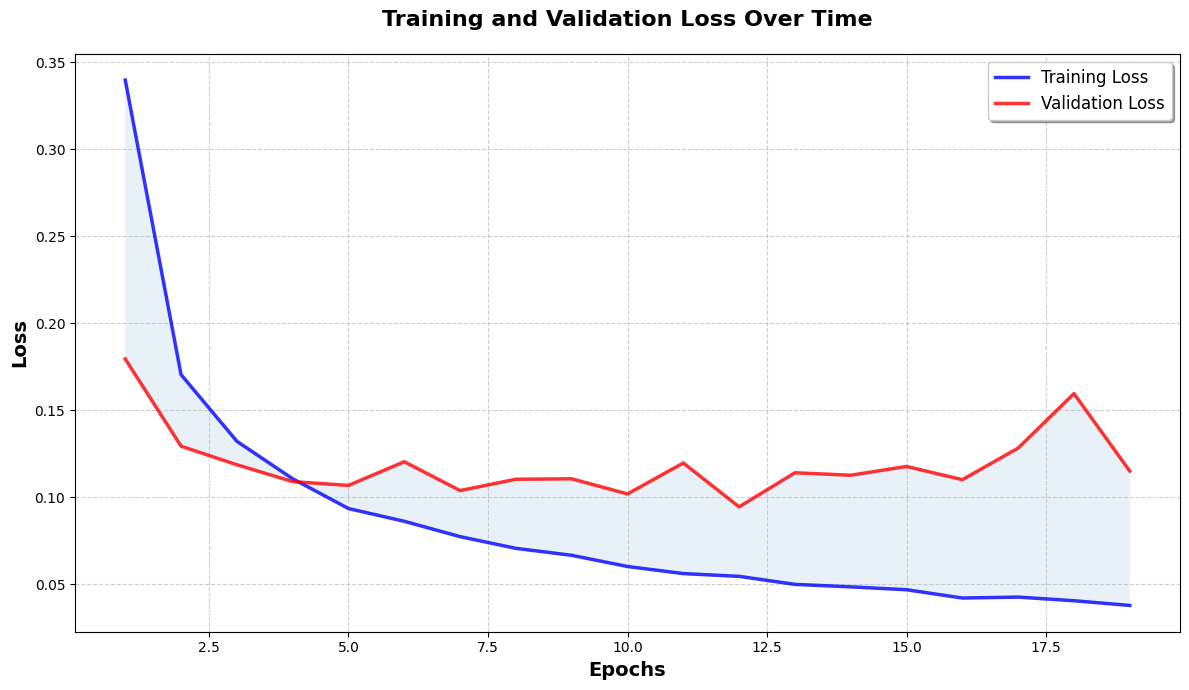

In [41]:
def main():
    config = {
        'learning_rate': 1e-3,
        'batch_size': 32,
        'step_size': 30,
        'gamma': 0.1,
        'checkpoint_freq': 5,
        'patience': 7,
        'grad_clip_value': None,  # Set to None to disable value clipping
        'grad_clip_norm': 1.0   # Set to None to disable norm clipping

    }


    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    train_dataset = datasets.MNIST('data', train=True, download=True, transform=transform)
    val_dataset = datasets.MNIST('data', train=False, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True, generator=torch.Generator(device='cpu'))
    val_loader = DataLoader(val_dataset, batch_size=config['batch_size'], generator=torch.Generator(device='cpu'))

    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(784, 128),
        nn.ReLU(),
        nn.Linear(128, 10)
    )

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=config['learning_rate'])

    trainer = Trainer(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        criterion=criterion,
        optimizer=optimizer,
        device=device,
        use_amp=True,
        config=config
    )

    trainer.train(num_epochs=100)

    trainer.plot_training_history()

if __name__ == "__main__":
    main()
